<a href="https://colab.research.google.com/github/ViniciusMangueira/Data_Science/blob/main/Movehub_Ranking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science para Classificação de Cidades: Onde a Magia Acontece.

“Atualmente, vivemos em um mundo globalizado!” Quantas vezes você já não escutou isso? 

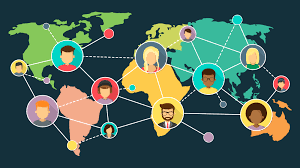

Essa frase pode ser utilizada em vários contextos como, por exemplo, para pessoas que querem se mudar para outro país, seja por uma oportunidade de trabalho ou uma qualidade de vida melhor.

A globalização atual permite que coisas como mudanças de países sejam mais fáceis. 

Mas...como escolher a cidade ideal para você?

Sites como a [Movehub](https://www.movehub.com/city-rankings/) descrevem detalhes de várias cidades espalhadas ao redor do mundo como, por exemplo, a qualidade de vida, a taxa de poluição e criminalidade, entre outros.

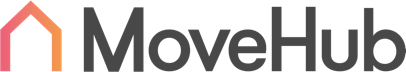

Nesse projeto, inicialmente vamos pegar um dataset do Kaggle (que você pode achar [aqui](https://www.kaggle.com/blitzr/movehub-city-rankings))) de dados retirados do Movehub, depois veremos as médias dos atributos para todas as cidades cadastradas para termos uma ideia inicial de como elas estão distribuídas pelo mundo para que, posteriormente, possamos fazer uma análise mais precisa da qualificação dada pelo Movehub para as cidades.

Por fim, iremos fingir que estamos em uma empresa responsável por ajudar na mudança entre cidades, e iremos aplicar um modelo de agrupamento, K-means, para agrupar as cidades que possuem características semelhantes em uma quantidade de grupos a nossa escolha. Dessa forma, conseguiremos oferecer para o cliente uma cartela de cidades que possuem as qualidades desejadas por ele.

## Importação dos Dados

Inicialmente, vamos importar os dados e na sequência ver o formato do arquivo.

In [ ]:
# Bibliotecas
import pandas as pd
import missingno as msno
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
# Importar arquivos 
df1 = pd.read_csv("/content/cities.csv")
df2 = pd.read_csv("/content/movehubcostofliving.csv")
df3 = pd.read_csv("/content/movehubqualityoflife.csv")

In [ ]:
print(f"O df1 tem {df1.shape[0]} entradas e {df1.shape[1]} variáveis.")
print(f"O df2 tem {df2.shape[0]} entradas e {df2.shape[1]} variáveis.")
print(f"O df3 tem {df3.shape[0]} entradas e {df3.shape[1]} variáveis.")

O df1 tem 3543 entradas e 2 variáveis.
O df2 tem 216 entradas e 7 variáveis.
O df3 tem 216 entradas e 7 variáveis.


Dessa forma, pelo número de entradas muito diferente, percebemos que nem todas as cidades do df1 estão catalogadas nos datasets df2 e df3.

Para termos uma ideia melhor, vamos colocar as entradas para serem exibidas por ordem alfabética do nome da cidade e, posteriormente, ver as 5 primeiras entradas de cada dataset.

In [ ]:
df1 = df1.sort_values(by="City", ascending=True).reset_index(drop=True)
df2 = df2.sort_values(by="City", ascending=True).reset_index(drop=True)
df3 = df3.sort_values(by="City", ascending=True).reset_index(drop=True)

In [ ]:
# Ver as 5 primeiras entradas do df1
df1.head()

,City,Country
0,A Coruña,Spain
1,Aachen,Germany
2,Aalborg,Denmark
3,Aarhus,Denmark
4,Aba,Nigeria


In [ ]:
# Ver as 5 primeiras entradas do df2
df2.head()

,City,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income
0,Aachen,2.05,6.88,4.26,1.33,767.23,1619.72
1,Aberdeen,1.99,6.98,5.98,1.37,1195.74,1743.78
2,Abu Dhabi,2.67,6.23,13.73,0.30,1779.93,2135.92
3,Addis Ababa,0.46,2.29,4.18,0.72,653.77,124.22
4,Adelaide,2.49,11.42,10.08,0.95,1382.26,2911.69


In [ ]:
# Ver as 5 primeiras entradas do df3
df3.head()

,City,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating
0,Aachen,81.64,60.55,73.25,11.69,90.52,15.34
1,Aberdeen,81.89,49.70,82.86,34.31,76.77,24.22
2,Abu Dhabi,86.40,68.03,48.02,53.42,80.80,10.86
3,Addis Ababa,59.88,6.38,63.89,85.59,28.41,26.04
4,Adelaide,87.29,72.03,56.25,12.01,91.54,41.32


Pela visualização acima, notamos que das 5 cidades que a aparecem no df1 apenas Aachen (Alemanha) aparece no df2 e no df3.

## Análise Inicial

### Dados Faltantes

Nesse momento, estamos interessados em saber se existem dados faltantes nos datasets. Para isso, utilizaremos a biblioteca **MissingNo** que nos proporcionará uma visualização interativa dos famosos dados ‘NaN’.

Vale lembrar, para os que nunca viram essa biblioteca, que para sabermos a quantidade de valores faltantes basta olharmos o número que fica em cima da barra da variável e compará-lo com o número na parte superior direita, se forem iguais não existem dados faltantes e caso sejam diferentes temos valores faltantes. 

Por exemplo, para o **df1**, temos as variáveis `City` e `Country` com 3543 e 3540 valores, respectivamente. Ao olharmos pra parte superior direita vemos que o total de entradas são 3543 e, desta forma, percebemos que não existem dados nulos para `City` e já para `Country` temos 3 valores faltantes.

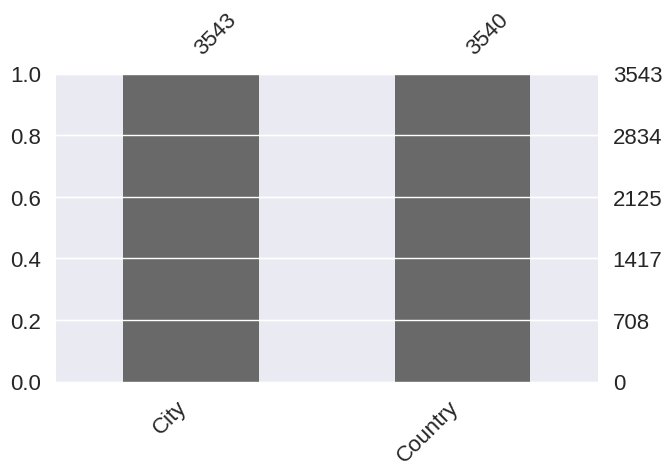

In [ ]:
# Dados faltantes de df1
msno.bar(df1, figsize=(7, 4));

Na sequência, vemos que para **df2** e **df3** não existem valores nulos para nenhuma coluna.

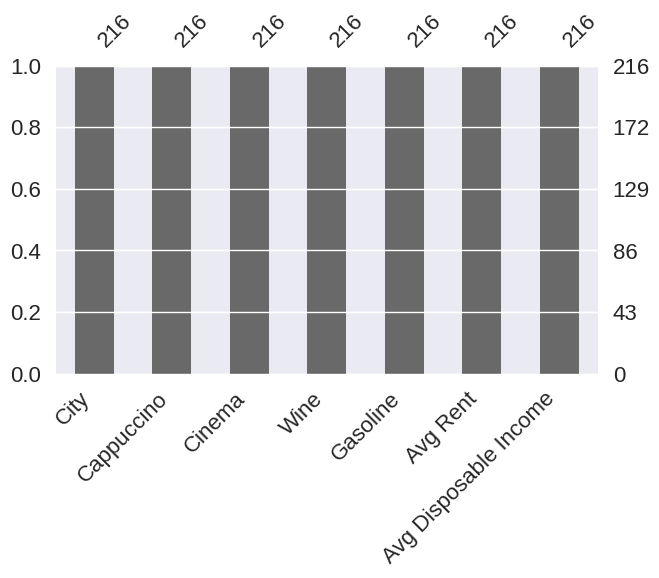

In [ ]:
# Dados faltantes de df2
msno.bar(df2, figsize=(7, 4));

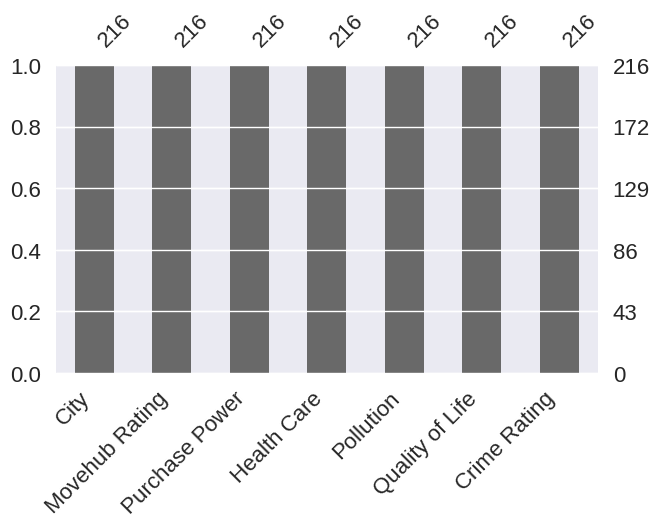

In [ ]:
# Dados faltantes de df3
msno.bar(df3, figsize=(7, 4));

### Outliers

Agora, queremos saber se existem outliers no nosso dataset para podermos tratá-los a fim de que, no futuro, eles não atrapalhem nossos insights. Assim, vamos usar o famigerado método *describe*.

In [ ]:
# Estatísticas do df1
df1.describe()

,City,Country
count,3543,3540
unique,3489,175
top,City,China
freq,24,435


Na sequência, temos as estatísticas do df2. Percebemos a presença de outliers nas colunas `Cinema`, `Wine` e `Avg Rent`. Por exemplo, em `Cinema` enquanto 75% dos dados tem o valor de 7.85 o máximo tem 79.49 e já em `Wine` 75% tem o valor 8.47 o máximo tem 26.15. Além disso, queremos ver se `Gasoline` tem outliers inferiores.

In [ ]:
# Estatísticas do df2
df2.describe()

,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income
count,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,1.981481,6.775602,7.079722,1.001898,1092.979213,1413.530463
std,0.737131,5.632751,3.325691,0.351713,664.778486,912.013027
min,0.460000,1.810000,2.130000,0.070000,120.680000,120.680000
25%,1.320000,4.397500,4.260000,0.735000,609.015000,549.860000
50%,2.085000,6.540000,6.540000,0.950000,980.650000,1535.415000
75%,2.490000,7.850000,8.472500,1.320000,1388.095000,2053.812500
max,4.480000,79.490000,26.150000,1.690000,5052.310000,4266.110000


Por fim, nas estatísticas do df3 vemos que os dados estão bem distribuídos e não existem outliers que vão nos atrapalhar.

In [ ]:
# Estatísticas do df3
df3.describe()

,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating
count,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,79.676713,46.477176,66.442824,45.240370,59.994537,41.338611
std,6.501011,20.614519,14.416412,25.369741,22.019376,16.416409
min,59.880000,6.380000,20.830000,0.000000,5.290000,9.110000
25%,75.070000,28.815000,59.420000,24.410000,42.752500,29.375000
50%,81.060000,49.220000,67.685000,37.210000,65.150000,41.140000
75%,84.020000,61.607500,77.207500,67.675000,78.617500,51.327500
max,100.000000,91.850000,95.960000,92.420000,97.910000,85.700000


### Concatenação dos Datasets df2 e df3

Ao fim da nossa análise inicial, vamos concatenar df2 com df3 para facilitar o trabalho futuro.

In [ ]:
# Excluir a coluna City que ficaria duplicada
df3.drop(columns='City', inplace=True)

# Concatenação dos datasets df2 e df3
df_concat = pd.concat(objs=[df2, df3], axis=1)
df_concat

,City,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating
0,Aachen,2.05,6.88,4.26,1.33,767.23,1619.72,81.64,60.55,73.25,11.69,90.52,15.34
1,Aberdeen,1.99,6.98,5.98,1.37,1195.74,1743.78,81.89,49.70,82.86,34.31,76.77,24.22
2,Abu Dhabi,2.67,6.23,13.73,0.30,1779.93,2135.92,86.40,68.03,48.02,53.42,80.80,10.86
3,Addis Ababa,0.46,2.29,4.18,0.72,653.77,124.22,59.88,6.38,63.89,85.59,28.41,26.04
4,Adelaide,2.49,11.42,10.08,0.95,1382.26,2911.69,87.29,72.03,56.25,12.01,91.54,41.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,Warsaw,1.66,5.19,5.19,1.18,726.59,664.31,76.76,35.77,63.33,86.16,51.82,32.03
212,Washington,2.37,7.85,7.85,0.69,2451.63,2484.32,81.74,56.61,64.44,30.55,76.92,51.43
213,Wellington,2.20,8.82,8.27,1.17,1515.65,1763.67,81.06,49.11,73.72,30.55,79.83,27.38
214,Zagreb,1.12,3.70,4.48,1.23,504.36,605.23,73.84,26.71,52.78,83.45,47.59,32.29


Em seguida, vamos dar uma olhada nas informações do df_concat.

In [ ]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   City                   216 non-null    object 
 1   Cappuccino             216 non-null    float64
 2   Cinema                 216 non-null    float64
 3   Wine                   216 non-null    float64
 4   Gasoline               216 non-null    float64
 5   Avg Rent               216 non-null    float64
 6   Avg Disposable Income  216 non-null    float64
 7   Movehub Rating         216 non-null    float64
 8   Purchase Power         216 non-null    float64
 9   Health Care            216 non-null    float64
 10  Pollution              216 non-null    float64
 11  Quality of Life        216 non-null    float64
 12  Crime Rating           216 non-null    float64
dtypes: float64(12), object(1)
memory usage: 22.1+ KB


## Remoção dos Outliers

Agora que concatenamos o df2 e df3, vamos achar os outliers e, posteriormente, excluí-los. 

Para achá-los, vamos definir os limites inferiores e superiores.

In [ ]:
# Verificar o limite inferior e superior de Cinema
q1_Cinema = df_concat.Cinema.quantile(.25)
q3_Cinema = df_concat.Cinema.quantile(.75)
Iqr_Cinema = q3_Cinema - q1_Cinema
sup_Cinema = q3_Cinema + 1.5*Iqr_Cinema
inf_Cinema = q1_Cinema - 1.5*Iqr_Cinema

print("Iqr da variável Cinema: ", Iqr_Cinema)
print("Limite Superior de atributo: ", sup_Cinema)
print("Limite Inferior de atributo: ", inf_Cinema)


Iqr da variável Cinema:  3.4524999999999997
Limite Superior de atributo:  13.028749999999999
Limite Inferior de atributo:  -0.7812499999999991


In [ ]:
# Verificar o limite inferior e superior de Avg Rent
q1_Avg_Rent = df_concat['Avg Rent'].quantile(.25)
q3_Avg_Rent = df_concat['Avg Rent'].quantile(.75)
Iqr_Avg_Rent = q3_Avg_Rent - q1_Avg_Rent
sup_Avg_Rent = q3_Avg_Rent + 1.5*Iqr_Avg_Rent
inf_Avg_Rent = q1_Avg_Rent - 1.5*Iqr_Avg_Rent

print("Iqr da variável Avg Rent: ", Iqr_Avg_Rent)
print("Limite Superior de atributo: ", sup_Avg_Rent)
print("Limite Inferior de atributo: ", inf_Avg_Rent)

Iqr da variável Avg Rent:  779.0799999999998
Limite Superior de atributo:  2556.7149999999992
Limite Inferior de atributo:  -559.6049999999997


In [ ]:
# Verificar o limite inferior e superior de Wine
q1_Wine = df_concat.Wine.quantile(.25)
q3_Wine = df_concat.Wine.quantile(.75)
Iqr_Wine = q3_Wine - q1_Wine
sup_Wine = q3_Wine + 1.5*Iqr_Wine
inf_Wine = q1_Wine - 1.5*Iqr_Wine

print("Iqr da variável Wine: ", Iqr_Wine)
print("Limite Superior de atributo: ", sup_Wine)
print("Limite Inferior de atributo: ", inf_Wine)

Iqr da variável Wine:  4.2125
Limite Superior de atributo:  14.791250000000002
Limite Inferior de atributo:  -2.0587500000000007


In [ ]:
# Verificar o limite inferior de Gasoline
q1_Gasoline = df_concat['Gasoline'].quantile(.25)
q3_Gasoline = df_concat['Gasoline'].quantile(.75)
Iqr_Gasoline = q3_Gasoline - q1_Gasoline
inf_Gasoline = q1_Gasoline - 1.5*Iqr_Gasoline

print("Iqr da variável Gasoline: ", Iqr_Gasoline)
print("Limite Inferior de atributo: ", inf_Gasoline)

Iqr da variável Gasoline:  0.5850000000000002
Limite Inferior de atributo:  -0.1425000000000004


Visto isso, vamos excluir agora os outliers.

In [ ]:
#Remover os outliers
df_clean = df_concat.copy()
df_clean.drop(df_clean[df_clean['Cinema']> 13.02].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean['Avg Rent']>2600].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean['Wine']>14.79].index, axis=0, inplace=True)

## Histograma das Variáveis

A seguir, queremos ver como estão distribuídos os valores das nossas variáveis no mundo. 

Para isso, iremos plotar histogramas das variáveis. 

No entanto, vamos ver o histograma inicialmente com os outliers e depois sem para podermos compará-los.

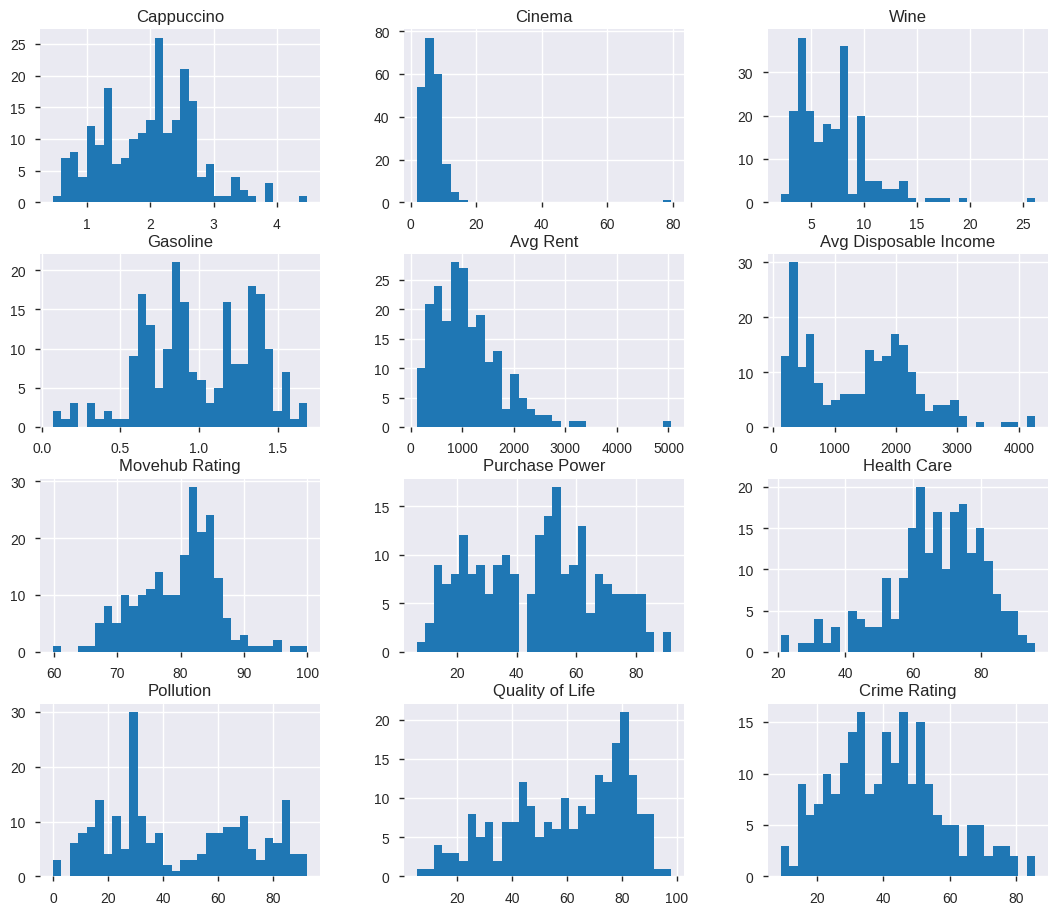

In [ ]:
# Histograma
df_concat.hist(bins=30, figsize=(13,11));

Acima, para os atributos `Cinema`, `Wine` e `Avg Rent`realmente vemos o quanto os outliers prejudicam a nossa visualização. 

Plotando novamente o histograma, só que agora sem os outliers, percebemos uma melhora na qualidade da visualização que nos permite entender melhor os dados.

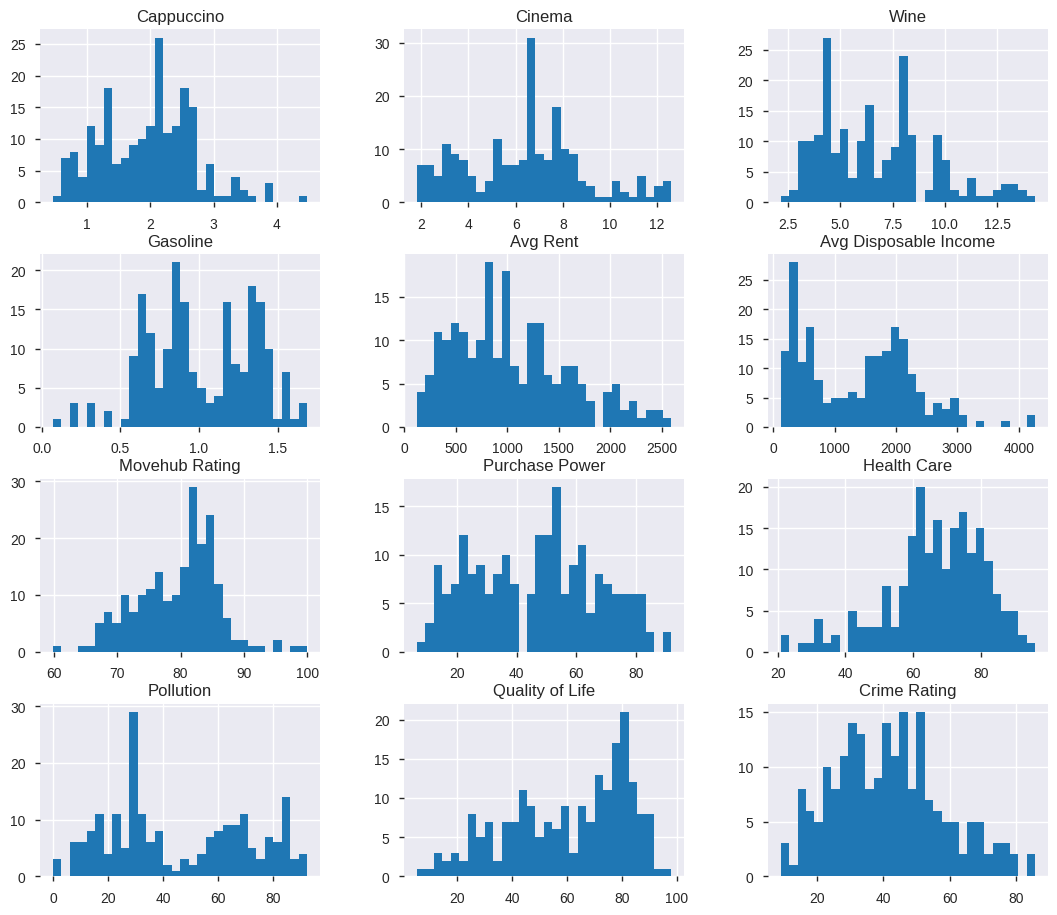

In [ ]:
# Histograma
df_clean.hist(bins=30, figsize=(13,11));

O histograma acima é muito útil quando queremos tirar algum insight relacionado a média do valor dos dados de uma variável. 

Por exemplo, para a variável `Wine` vemos que o seu valor no mundo varia entre 2 (mínimo) e 14(máximo). No intervalo existem 2 picos, um para valores um pouco maiores do que 4 e outro para o valor 8, ou seja, esses são os valores mais comuns no mundo. 

## Correlação

Nessa parte do projeto, queremos ver como as variáveis do dataset se relacionam umas com as outras. 

Para isso, iremos calcular a correlação e, em seguida, plotar um heatmap (mapa de calor, em português) para uma visualização mais fácil dos resultados.

In [ ]:
# Matriz de correlação
corr = df_clean.drop(columns='City').corr()

# Mostrar a matriz de correlação
display(corr)

,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating
Cappuccino,1.000000,0.789793,0.537726,0.112595,0.666186,0.727559,0.484464,0.510018,0.278597,-0.315572,0.524176,-0.202305
Cinema,0.789793,1.000000,0.389869,0.335777,0.746364,0.812775,0.591935,0.546035,0.398065,-0.378215,0.589871,-0.233406
Wine,0.537726,0.389869,1.000000,-0.333257,0.479496,0.398642,0.229627,0.229639,0.172370,-0.124934,0.177519,-0.032553
Gasoline,0.112595,0.335777,-0.333257,1.000000,0.027140,0.122852,0.115767,-0.027376,0.235336,-0.272345,0.170210,-0.316083
Avg Rent,0.666186,0.746364,0.479496,0.027140,1.000000,0.733253,0.555019,0.460991,0.270462,-0.295991,0.431781,-0.122290
Avg Disposable Income,0.727559,0.812775,0.398642,0.122852,0.733253,1.000000,0.771357,0.848596,0.370847,-0.296843,0.806075,-0.247035
Movehub Rating,0.484464,0.591935,0.229627,0.115767,0.555019,0.771357,1.000000,0.838095,0.370344,-0.241725,0.748572,-0.177697
Purchase Power,0.510018,0.546035,0.229639,-0.027376,0.460991,0.848596,0.838095,1.000000,0.313082,-0.201702,0.842746,-0.188796
Health Care,0.278597,0.398065,0.172370,0.235336,0.270462,0.370847,0.370344,0.313082,1.000000,-0.161124,0.472048,-0.244159
Pollution,-0.315572,-0.378215,-0.124934,-0.272345,-0.295991,-0.296843,-0.241725,-0.201702,-0.161124,1.000000,-0.325941,0.152670


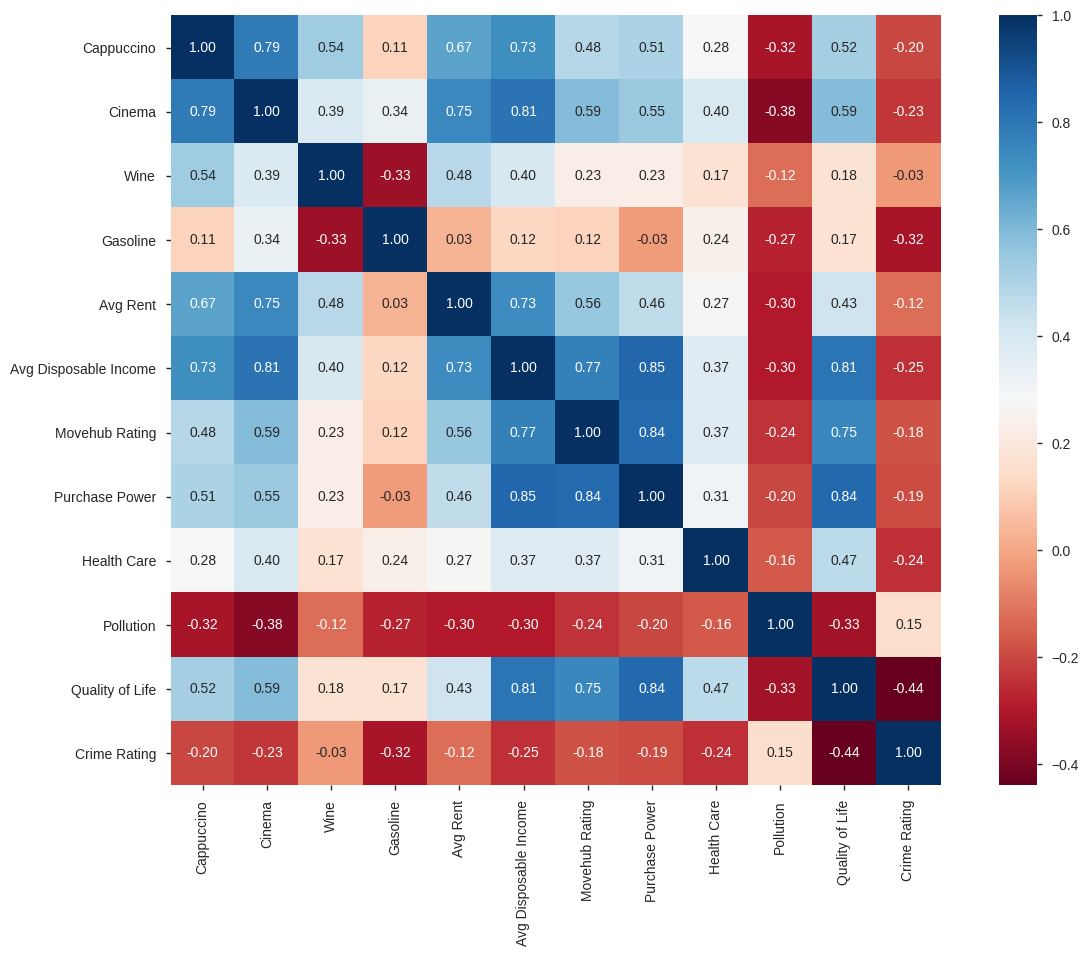

In [ ]:
#Mapa de calor da correlação
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Pelo heatmap acima, vemos por exemplo que `Quality of Life` tem uma correlação forte com `Purchase Power`, `Movehub Rating` e `Avg Disposable Income` e negativa com `Pollution` e `Crime Rating`, ou seja, quanto maior é o valor de `Quality of Life` maior o valor das outras três primeiras variáveis e menor o valor das últimas duas (O que é um pouco óbvio, visto que quanto maior a qualidade de vida menor deve ser a taxa de poluição e criminal).

Por outro lado, temos um fato interessante a ser notado. Analisando o atributo `Avg Rent` vemos que ela tem uma correlação forte com `Cinema` e moderada com `Cappuccino`, ou seja, o valor médio do aluguel da cidade tem uma relação com o preço do Cinema e do Cappuccino! 

Você já tinha pensado nisso? 

Não? Normal, são coisas que só com Data Science conseguimos perceber! E essa é a magia da parada.

“Seguir iremos”, como diria o Mestre Yoda de Star Wars.


## Movehub Rating

Na sequência, analisaremos quais são as 10 cidades mais bem classificadas pela Movehub.

In [ ]:
# Ver as 10 Cidades que tem a maior classificação pela Movehub Rating
df_clean.sort_values(by='Movehub Rating', ascending=False).head(10)

,City,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Crime Rating
115,London,2.49,11.26,6.98,1.40,2590.76,1992.89,100.00,53.17,69.53,57.95,47.89,50.14
66,Dubai,2.62,6.23,12.77,0.31,1981.57,2313.91,98.44,69.64,67.78,30.81,85.16,19.36
154,Paris,2.56,8.95,5.11,1.32,2131.21,2045.96,95.92,47.08,83.33,59.18,52.62,53.75
156,Perth,2.87,11.43,10.08,0.97,2083.14,3358.55,95.38,62.11,80.56,23.53,74.62,50.01
128,Melbourne,2.35,12.10,10.08,0.95,2073.06,2623.41,92.58,55.48,76.67,30.28,68.99,48.75
64,Doha,2.78,6.28,14.32,0.18,2221.74,2775.58,90.73,81.96,68.06,83.45,80.28,27.17
67,Dublin,2.39,8.31,8.52,1.39,1278.72,1918.09,90.45,50.13,41.12,30.54,65.27,48.31
26,Berlin,1.88,6.82,3.84,1.36,916.42,1772.57,89.54,68.72,65.48,16.05,91.17,24.18
135,Montreal,1.91,7.65,9.56,0.89,956.27,1785.03,89.28,66.99,66.77,6.27,78.55,31.63
198,Toronto,2.23,8.29,9.50,0.83,1593.78,1912.54,88.42,61.44,66.11,8.95,77.02,27.40


Pelo ranking, Londres recebe a nota máxima (100) e é a cidade no topo da classificação. 

No entanto, ela merece? Vamos analisar rapidamente...

Para isso, iremos considerar principalmente as variáveis `Avg Rent`,`Health Care`, `Pollution`, `Quality of Life`	e `Crime Rating` para, posteriormente, compararmos com Dubai, Peth e Berlin que estão na segunda, quarta e oitava posição respectivamente.


A primeira coisa a se destacar são os valores dos atributos destacados de Londres. Ela recebe 47.89 para qualidade de vida (pelo histograma acima vemos que tem países chegando a quase 100 o que torna esse valor de Londres péssimo), uma taxa criminal (50.14) acima da média dos outros países, uma poluição relativamente alta (57.95), um aluguel médio altíssimo (2590.76) e por fim uma taxa de cuidado de saúde de (69.53) que é relativamente boa (mas existem muitas cidades melhores como vimos no histograma).

Comparando agora a cidade da Rainha com Dubai (segunda colocada no ranking), vemos que a cidade localizada nos Emirados Árabes Unidos tem números muito melhores para `Pollution`, `Quality of Life`, `Crime Rating` e `Avg Rating`, e um resultado pouco pior em `Health Care`.

Esse padrão segue para Perth e Berlin que, ao todo, possuem números melhores nos atributos comparados.

Assim, vemos que embora Londres esteja no topo do ranking existem cidades com uma qualidade de vida no geral bem melhor!


## K-Means

Chegamos na parte interessante!

Vamos agora fingir que somos uma empresa responsável por ajudar na mudança entre cidades e queremos achar a cidade perfeita para o nosso cliente se mudar. Para isso, iremos perguntar entre as variáveis do nosso dataset as duas que ele acha mais importante. Ao perguntar, agruparemos as cidades pelas variáveis escolhidas.

Como? 

Iremos utilizar o modelo de Agrupamento K-Means, o qual vai juntar determinadas cidades que possuem as mesmas características em uma quantidade de grupos a nossa escolha.


Por exemplo, uma pessoa quer se mudar para uma cidade onde não haja muitos problemas de poluição e criminalidade, assim iremos atrás  de uma lista de opções de cidades com essas características. Além desse caso, vamos achar também o grupo de cidades que possuem a melhor qualidade de vida com o menor valor de aluguel médio (Pois, como vimos anteriormente, essas duas tem uma correlação fraca, ou seja, uma ser alta não implica a outra também ser, assim utilizar o modelo K-means é uma ótima opção para achar cidades que possuem valores altos pra ambos atributos).

### Agrupamento por: **Pollution** e **Crime Rating**

Como dito anteriormente, vamos construir um modelo para os clientes que escolherem locais com taxa de poluição e criminalidade baixas!

#### Elbow Method

No entanto, antes de começarmos no K-means, precisamos definir a quatidade de Clusters. 

Para isto, utilizaremos o Elbow Method!


In [ ]:
# Criar um subdataset com as variáveis abaixo que vão ser analisadas futuramente
Y = df_clean[['Pollution', 'Crime Rating']]

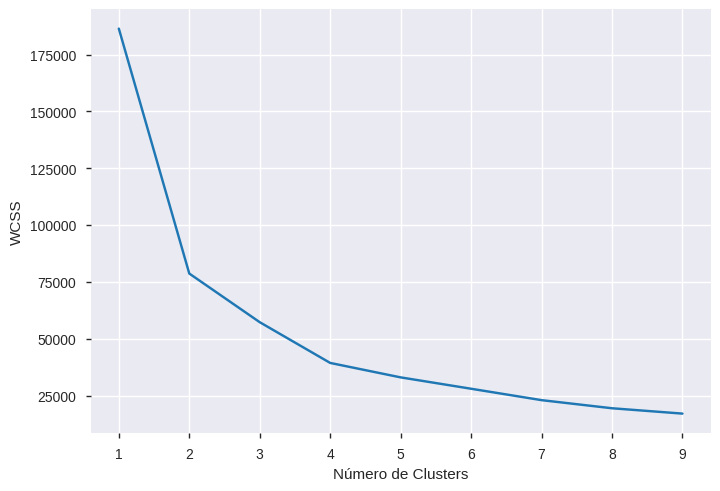

In [ ]:
# Metodo
wcss = [] 
for i in range(1, 10):
        kmeans = KMeans(n_clusters=i, random_state=0)
        kmeans.fit(Y) 
        wcss.append(kmeans.inertia_) 
        
#Grafico
import matplotlib.pyplot as plt
plt.plot(range(1, 10), wcss)
plt.xlabel('Número de Clusters') 
plt.ylabel('WCSS');

Portanto, vamos escolher o valor 4 para quantidade de Clusters.

#### Modelo

Começaremos a construir nosso modelo de agrupamento agora.

In [ ]:
# Modelo
model1 = KMeans(n_clusters=4)

In [ ]:
# Fit do modelo (treinar)
model1.fit(Y);

In [ ]:
# Fazer previsões em cima de novos dados
y_pred1 = model1.predict(Y)

In [ ]:
# Marcar os centro dos Clusters
centroides = model1.cluster_centers_

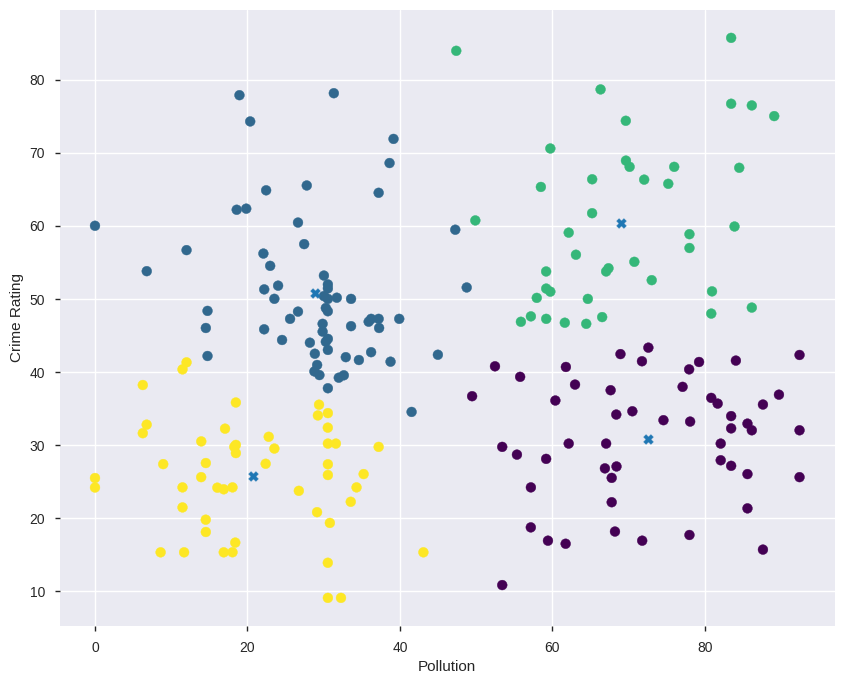

In [ ]:
# Plotar Grafico
fig, ax = plt.subplots(figsize=(10,8))
plt.scatter('Pollution', 'Crime Rating',  data=Y, c=y_pred1, s=50, cmap='viridis')
plt.scatter(centroides[:, 0], centroides[:, 1], marker="X")
plt.xlabel('Pollution')
plt.ylabel('Crime Rating')
plt.show()

Agora que definimos os grupos, vamos adicionar uma coluna no dataset que contém a qual cluster a cidade pertence. 

Após isso, iremos pegar o grupo que possui as menores taxas de poluição e criminalidade e, posteriormente, enxugar ele mais ainda ficando só com as cidades que tem taxa de poluição e criminalidade menor do que 30.

In [ ]:
# Adicionar uma coluna no dataset df_clean com o numero do cluster que a cidade pertence
lista1 = np.column_stack((df_clean, y_pred1))
lista1 = lista1[lista1[:,13].argsort()]

In [ ]:
# Tranformar em Dataframe
lista1 = pd.DataFrame(lista1, columns=['City', 'Cappuccino', 'Cinema', 'Wine', 'Gasoline', 'Avg Rent', 
                                       'Avg Disposable Income', 'Movehub Rating', 'Purchase Power', 'Health Care', 
                                       'Pollution', 'Quality of Life', 'Criminal Rating', 'Cluster Number'])

In [ ]:
# Visualizar os dados das cidades que estao no cluster 3
lista1 = lista1[lista1['Cluster Number']==3].sort_values(by='Quality of Life', ascending=False)
lista1.drop(lista1[lista1['Pollution']>=30].index, axis=0, inplace=True)
lista1.drop(lista1[lista1['Criminal Rating']>=30].index, axis=0, inplace=True)

In [ ]:
# Visualizar os dados por ordem decrescente de Qualidade de Vida
lista1.sort_values(by='Quality of Life', ascending=False).head(8)

,City,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Criminal Rating,Cluster Number
205,Zurich,3.28,12.59,8.4,1.31,2378.61,4197.55,85.89,79.58,78.33,18.04,97.91,15.35,3
179,Berlin,1.88,6.82,3.84,1.36,916.42,1772.57,89.54,68.72,65.48,16.05,91.17,24.18,3
169,Aachen,2.05,6.88,4.26,1.33,767.23,1619.72,81.64,60.55,73.25,11.69,90.52,15.34,3
168,Stuttgart,2.13,6.82,4.26,1.32,980.35,1943.66,82.48,65.82,80.38,16.89,90.4,23.96,3
171,Dresden,2.13,6.82,3.84,1.33,1193.48,2088.58,84.75,82.6,78.29,16.89,90.21,15.34,3
203,Frankfurt,2.13,7.67,4.07,1.36,1022.98,1875.46,82.75,62.6,65.33,14.54,88.04,27.55,3
186,Dusseldorf,2.13,8.31,4.47,1.28,1193.48,2301.7,83.45,72.52,75.98,8.61,88.02,15.34,3
176,Calgary,2.55,8.29,9.56,0.74,1115.65,2231.29,85.77,63.9,75.33,23.53,87.57,29.53,3


Acima, temos a lista que das cidades que se enquadram nos nossos parâmetros. Ao apresentá-las para os clientes podemos mostrar as vantagens e desvantagens de cada uma.

Por exemplo, Zurich possui a maior qualidade de vida das cidades da lista com o valor de 97.91, mas o valor médio do aluguel é de 2378 que é o maior também. Por outro lado, Aachen tem uma qualidade de vida um pouco menor com nota 90.52, porém tem aluguel médio de 767.

Dessa forma, ao criar esse grupo de cidades, abrimos um leque de escolhas para os nossos clientes! 


### Agrupamento por: **Avg Rent** e **Quality of Life**


#### Elbow Method

In [ ]:
# Criar um subdataset com as variáveis abaixo que vão ser analisadas futuramente
X = df_clean[['Avg Rent','Quality of Life']]

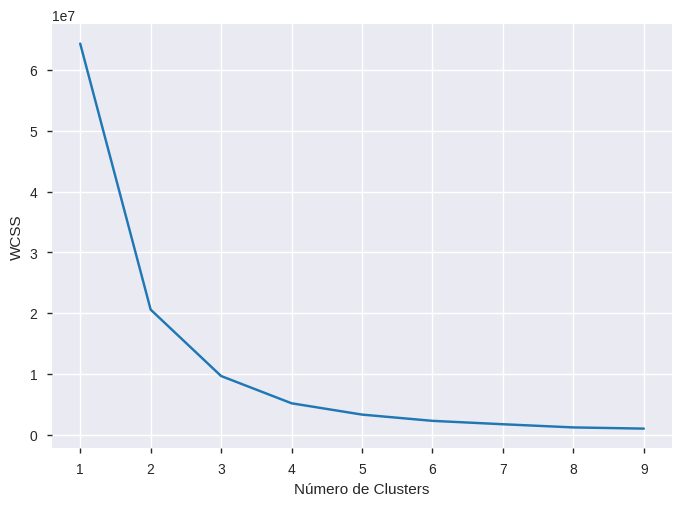

In [ ]:
# Metodo
wcss = [] 
for i in range(1, 10):
        kmeans = KMeans(n_clusters=i, random_state=0)
        kmeans.fit(X) 
        wcss.append(kmeans.inertia_) 
        
#Grafico
import matplotlib.pyplot as plt
plt.plot(range(1, 10), wcss)
plt.xlabel('Número de Clusters') 
plt.ylabel('WCSS');

Portanto, vamos escolher o valor 4 para quantidade de Clusters.

#### Modelo

Começaremos a construir nosso modelo agora.

In [ ]:
# Modelo
model = KMeans(n_clusters=4)

In [ ]:
# Fit do modelo (treinar)
model.fit(X);

In [ ]:
# Fazer previsões em cima de novos dados
y_pred = model.predict(X)

In [ ]:
# Marcar os centro dos Clusters
centroides = model.cluster_centers_

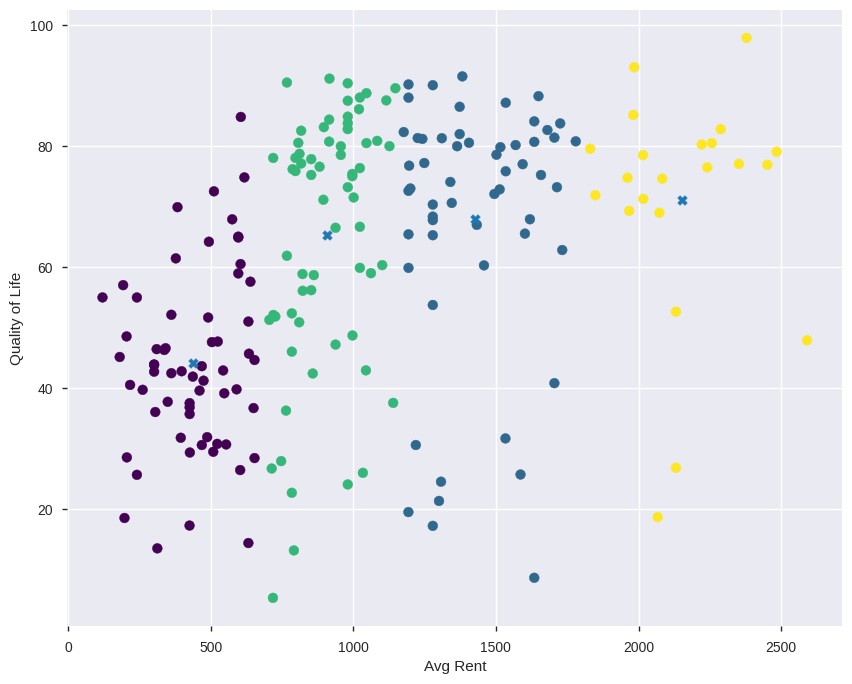

In [ ]:
# Plotar Grafico
fig, ax = plt.subplots(figsize=(10,8))
plt.scatter( 'Avg Rent', 'Quality of Life', data=X, c=y_pred, s=50, cmap='viridis')
plt.scatter(centroides[:, 0], centroides[:, 1], marker="X")
plt.xlabel('Avg Rent')
plt.ylabel('Quality of Life')
plt.show()

Acima, vemos os dados divididos em 4 grupos como escolhemos. 

Nele, vamos analisar os dados do grupo que tem um `Avg Rent` < 1000 e `Quality of Life`> 80. Pois, notamos que é o subgrupo que possui uma alta taxa de qualidade de vida juntamente com um preço baixo de aluguel médio. 

In [ ]:
# Adicionar uma coluna no dataset df_clean com o numero do cluster que a cidade pertence
lista2 = np.column_stack((df_clean, y_pred)) 
lista2 = lista2[lista2[:,13].argsort()]

In [ ]:
# Tranformar em Dataframe
lista2 = pd.DataFrame(lista2, columns=['City', 'Cappuccino', 'Cinema', 'Wine', 'Gasoline', 'Avg Rent', 
                                       'Avg Disposable Income', 'Movehub Rating', 'Purchase Power', 'Health Care', 
                                       'Pollution', 'Quality of Life', 'Criminal Rating', 'Cluster Number'])

In [ ]:
# Visualizar os dados das cidades que estao no cluster 2
lista2 = lista2[lista2['Cluster Number']==2].sort_values(by='Quality of Life', ascending=False)
lista2.drop(lista2[lista2['Quality of Life']< 84].index, axis=0, inplace=True)
lista2.drop(lista2[lista2['Avg Rent']>1000].index, axis=0, inplace=True)

In [ ]:
# Visualizar os dados por ordem decrescente de Qualidade de Vida
lista2.sort_values(by='Quality of Life', ascending=False)

,City,Cappuccino,Cinema,Wine,Gasoline,Avg Rent,Avg Disposable Income,Movehub Rating,Purchase Power,Health Care,Pollution,Quality of Life,Criminal Rating,Cluster Number
157,Berlin,1.88,6.82,3.84,1.36,916.42,1772.57,89.54,68.72,65.48,16.05,91.17,24.18,2
137,Aachen,2.05,6.88,4.26,1.33,767.23,1619.72,81.64,60.55,73.25,11.69,90.52,15.34,2
131,Stuttgart,2.13,6.82,4.26,1.32,980.35,1943.66,82.48,65.82,80.38,16.89,90.4,23.96,2
126,Saint Louis,1.96,6.54,6.54,0.61,980.65,2144.36,85.25,80.4,77.29,31.33,87.51,78.13,2
119,San Antonio,2.62,5.23,7.52,0.59,980.65,1964.58,83.76,74.78,60.97,59.19,84.88,51.41,2
163,Charlotte,2.15,5.23,7.19,0.6,915.28,2073.1,84.46,77.18,72.08,67.05,84.39,30.21,2


Ou seja, caso você deseje uma cidade com uma ótima qualidade de vida que possua uma média de aluguel barato podemos listar as cidades acima. Mas cuidado antes de escolher algumas para ir morar, pois como podemos ver **Saint Loius** tem uma taxa altíssima de criminalidade (78.13)  além de que **Charlotte** e **San Antonio** possuem uma alta poluição com valores de 67.05 e 59.19 respectivamente.

Dessa forma, fica a dica então para Berlin, Aachen e Stuttgart (todas da Alemanha) que possuem uma qualidade excelente na maioria das variáveis! 

## Extra: Pandas Profiling

Como um extra podemos extrair as informações de forma direta a partir do pandas profiling. Nele com poucas linhas de código, conseguimos fazer um relatório html com as informações estatísticas e as principais características do nosso dataframe.

In [ ]:
!pip install pandas_profiling -q

In [ ]:
import pandas_profiling

In [ ]:
report = pandas_profiling.ProfileReport(df_concat)

In [ ]:
report.to_notebook_iframe()
report.to_file("arq")

## Conclusão

Ao fim do nosso projeto, vimos tudo que foi proposto na introdução.

No começo, fizemos o tratamento dos dados removendo os outliers para uma visualização dos dados com histogramas que se aproximam o mais perto da realidade. 

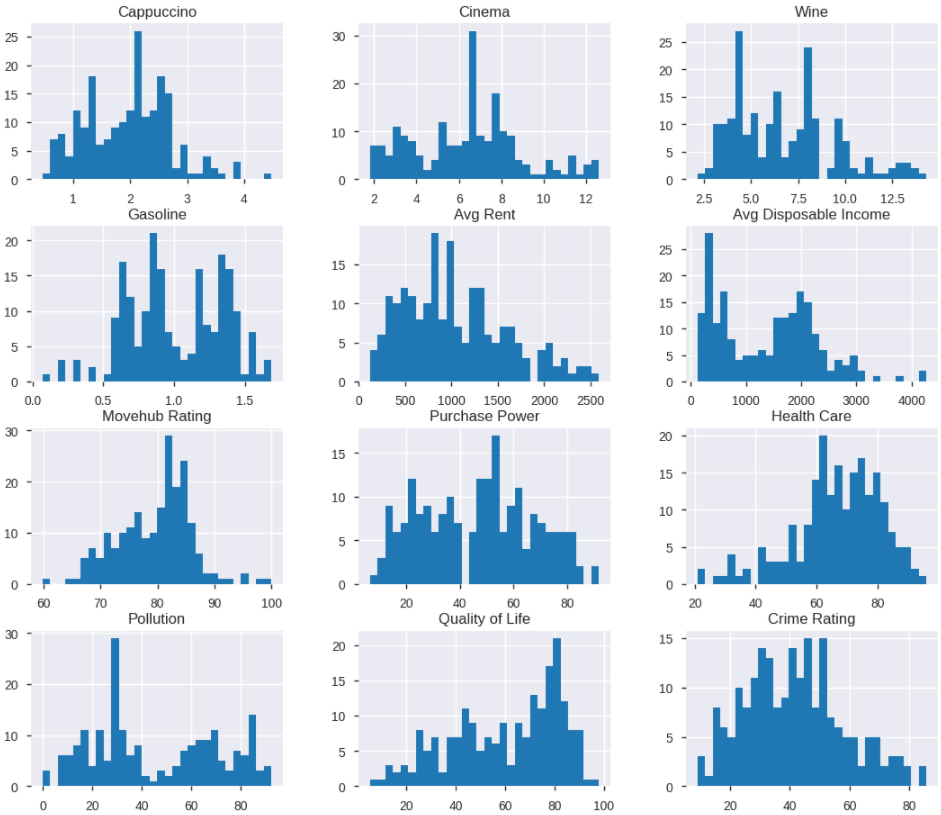

Posteriormente, foi feita uma revisão sobre a classificação das cidades dada pelo Movehub que, como vemos na imagem abaixo, não condiz muito com os valores atribuídos as variáveis, pois comparando Londres (primeira do ranking) com Dubai, Perth e Berlin (segunda, quarta e oitava colocadas no ranking, respectivamente), vimos que elas têm valores mais positivos para Pollution, Quality of Life, Crime Rating e Avg Rating e Health Care.

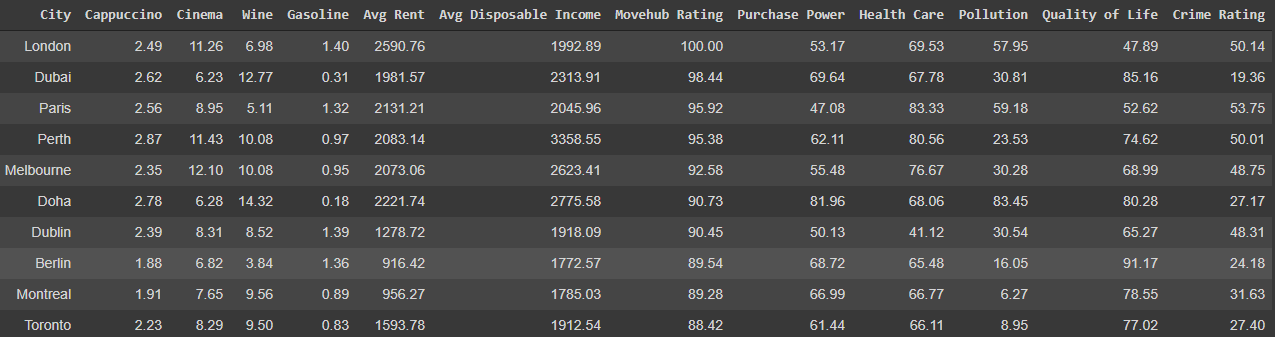

Por último, fizemos a utilização do modelo de agrupamento K-means, para construir cartelas das cidades com características parecidas baseadas no gosto dos clientes da nossa empresa fictícia. 

Por exemplo, ao receber um cliente que queira uma cidade com baixa taxa de poluição e criminalidade temos as cidades na imagem abaixo, as quais possuem outras vantagens e desvantagens como, por exemplo, Zurich possui a maior qualidade de vida das cidades da lista com o valor de 97.91, mas o valor médio do aluguel é de 2378 que é o maior também. Por outro lado, Aachen tem uma qualidade de vida um pouco menor com nota 90.52, porém tem aluguel médio de 767. 

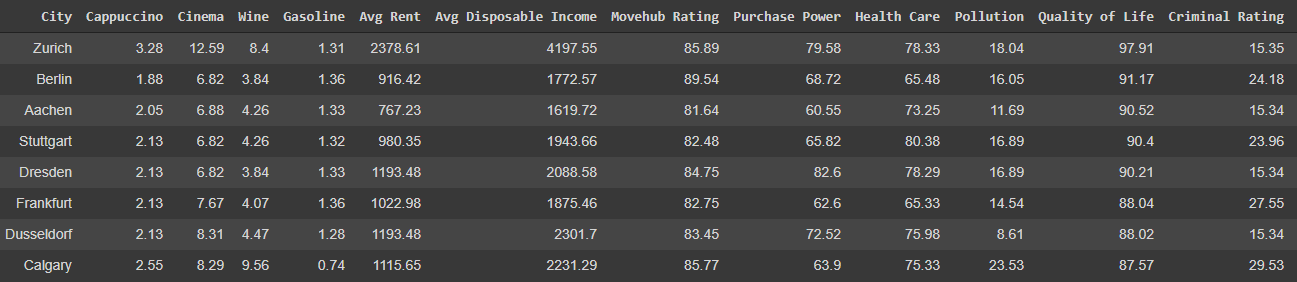

Outro exemplo dado, foi para uma pessoa que queria uma cidade com qualidade de vida alta e um valor de alguém médio baixo. Com isso, achamos as seguintes cidades:

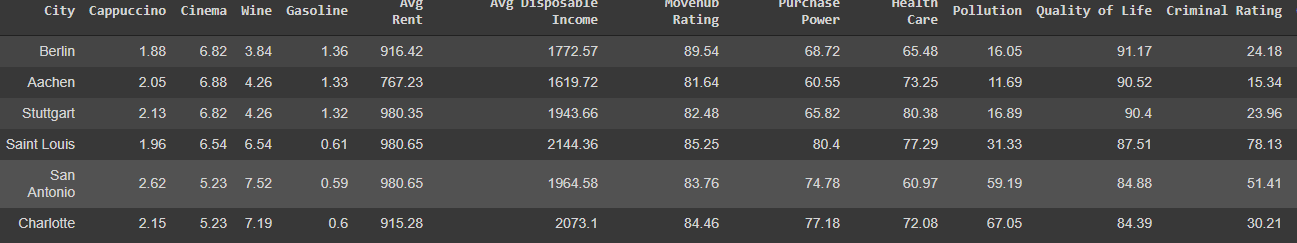

Vale lembrar que cada uma das cidades acima possui suas vantagens e desvantagens as quais os clientes também vão levar em consideração na hora de escolher!

Vale ressaltar também, que conseguimos fazer essas escolhas para qualquer par de variáveis do nosso dataset e as análises que foram feitas acima são exemplos das várias combinações que podemos fazer!

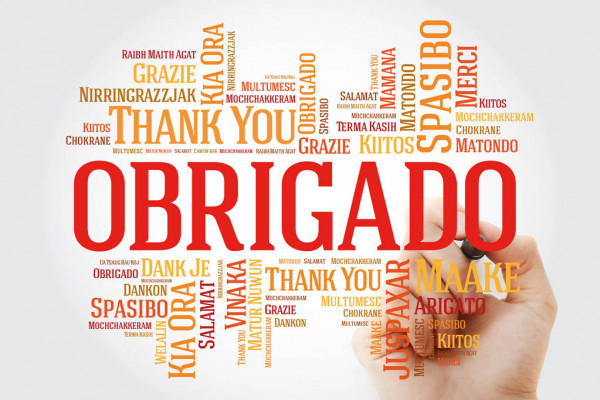